# Comparing Orbital Distributions


In [21]:
using CairoMakie
using Arya
using LilGuys
using CSV, DataFrames


In [11]:
using PyFITS

In [2]:
using HDF5

In [3]:
FIGDIR = "./figures"

"./figures"

In [45]:
CairoMakie.activate!(type=:png)

In [1]:
function read_distribution(name)
    df =  read_fits(joinpath(name, "peris_apos.fits"))

    replace!(df[!, :t_last_peri], missing=>NaN)

    if "peri_lmc" ∈ names(df)
        replace!(df[!, :t_last_peri_lmc], missing=>NaN)
    end

    df
end

read_distribution (generic function with 1 method)

In [2]:
plot_labels = Dict(
    "pericentre" => "pericentre / kpc",
    "peri_lmc" => "perilmc / kpc",
    "apocentre" => "apocentre / kpc",
    )

Dict{String, String} with 3 entries:
  "peri_lmc"   => "perilmc / kpc"
  "apocentre"  => "apocentre / kpc"
  "pericentre" => "pericentre / kpc"

In [40]:
function compare_peris(families; x="pericentre", legend_position=:lt)
	fig = Figure()
	ax = Axis(fig[1, 1],
		xlabel = plot_labels[x],
		ylabel = "pdf",
	)

    for (label, df) in families
    	bins, counts, err = LilGuys.histogram(df[:, x], normalization=:pdf)
    	lines!(midpoints(bins), counts, label=label)
    end

    Legend(fig[1,2], ax)

	fig
end

compare_peris (generic function with 1 method)

In [41]:
function compare_t_last_peris(families, legend_position=:lt)
    
	fig = Figure()
	ax = Axis(fig[1, 1],
		xlabel = "time since pericentre / Gyr",
		ylabel = "pdf"
	)

    for (label, df) in families
    	bins, counts, err = LilGuys.histogram(df.t_last_peri, normalization=:pdf)
    	lines!(midpoints(bins), counts, label=label)
    end

    Legend(fig[1,2], ax)

	fig
end

compare_t_last_peris (generic function with 2 methods)

In [42]:
function compare_apos(families)
    
	fig = Figure()
	ax = Axis(fig[1, 1],
		xlabel = "apocentre / kpc",
		ylabel = "pdf"
	)

    for (label, df) in families
    	bins, counts, err = LilGuys.histogram(df.apocentre, normalization=:pdf)
    	lines!(midpoints(bins), counts, label=label)
    end

    Legend(fig[1,2], ax)

	fig
end

compare_apos (generic function with 1 method)

In [6]:
using Printf

In [7]:
using StatsBase

In [8]:
function print_uncertanty(label, x)
    x = x[.!isnan.(x)]
    @printf "%16s%12.3f [%0.3f %0.3f] [[%0.3f %0.3f]]\n" label quantile(x, [0.5, 0.16, 0.84, 0.0014, 0.9986])...
end

print_uncertanty (generic function with 1 method)

In [9]:
function compare_stats(families)
    println("pericentre")
    
    for (label, df) in families
        print_uncertanty(label, df.pericentre)
    end

    println("t last peri")
    
    for (label, df) in families
        print_uncertanty(label, df.t_last_peri * T2GYR)
    end

    println("peri lmc")

    for (label, df) in families
        if "peri_lmc" ∈ names(df)
            print_uncertanty(label, df.peri_lmc)
        end
    end

    println("peri lmc time")

    for (label, df) in families
        if "peri_lmc" ∈ names(df)
            print_uncertanty(label, df.t_last_peri_lmc * T2GYR)
        end
    end

end

compare_stats (generic function with 1 method)

# Initial comparisons

In [48]:
families = [
    "EP2020" => read_distribution("EP2020"),
    "+distance" => read_distribution("EP2020_distance_err"),
    "hunter axi" => read_distribution("hunter+2024_axi"),
    "hunter barspiral" => read_distribution("hunter+2024_rotspiral"),
    "LMC" => read_distribution("vasiliev24_L3M11"),
    "nolmc" => read_distribution("vasiliev24_M11"),
    ]

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


6-element Vector{Pair{String, DataFrame}}:
           "EP2020" => 10000×5 DataFrame
   Row │ index  pericentre  apocentre  t_last_peri  t_last_apo 
       │ Int64  Float64     Float64    Float64      Float64    
───────┼───────────────────────────────────────────────────────
     1 │     1     6.74343   104.905       26.9141     170.024
     2 │     2     8.50756   107.48        27.9492     177.012
     3 │     3     9.45775   107.792       27.9492     178.047
     4 │     4     6.37952   105.491       26.9141     171.06
     5 │     5     8.0663    102.285       27.9492     167.954
     6 │     6     6.5585    100.352       26.9141     163.037
     7 │     7     7.13967   102.042       27.9492     166.919
     8 │     8     6.93149   104.304       27.9492     170.024
     9 │     9     5.94972    98.9879      26.9141     160.967
    10 │    10     6.75935   110.825       27.9492     180.117
    11 │    11     7.53951   106.015       26.9141     172.095
   ⋮   │   ⋮        ⋮           

In [49]:
compare_stats(families)

pericentre
          EP2020       7.019 [6.086 8.017] [[4.414 10.068]]
       +distance       7.058 [5.122 9.265] [[2.302 15.002]]
      hunter axi       7.452 [6.500 8.467] [[4.736 10.692]]
hunter barspiral       7.453 [6.487 8.444] [[4.771 10.576]]
             LMC       8.069 [7.025 9.084] [[2.511 11.060]]
           nolmc       7.211 [6.289 8.262] [[4.520 10.448]]
t last peri
          EP2020       0.132 [0.127 0.132] [[0.122 0.137]]
       +distance       0.132 [0.122 0.137] [[0.109 0.151]]
      hunter axi       0.137 [0.132 0.137] [[0.127 0.142]]
hunter barspiral       0.137 [0.132 0.137] [[0.127 0.142]]
             LMC       0.137 [0.132 0.137] [[0.132 0.142]]
           nolmc       0.137 [0.132 0.137] [[0.127 0.142]]
peri lmc
peri lmc time


[ Info: Using default bins of size = 61
[ Info: Using default bins of size = 60
[ Info: Using default bins of size = 66
[ Info: Using default bins of size = 63
[ Info: Using default bins of size = 87
[ Info: Using default bins of size = 68


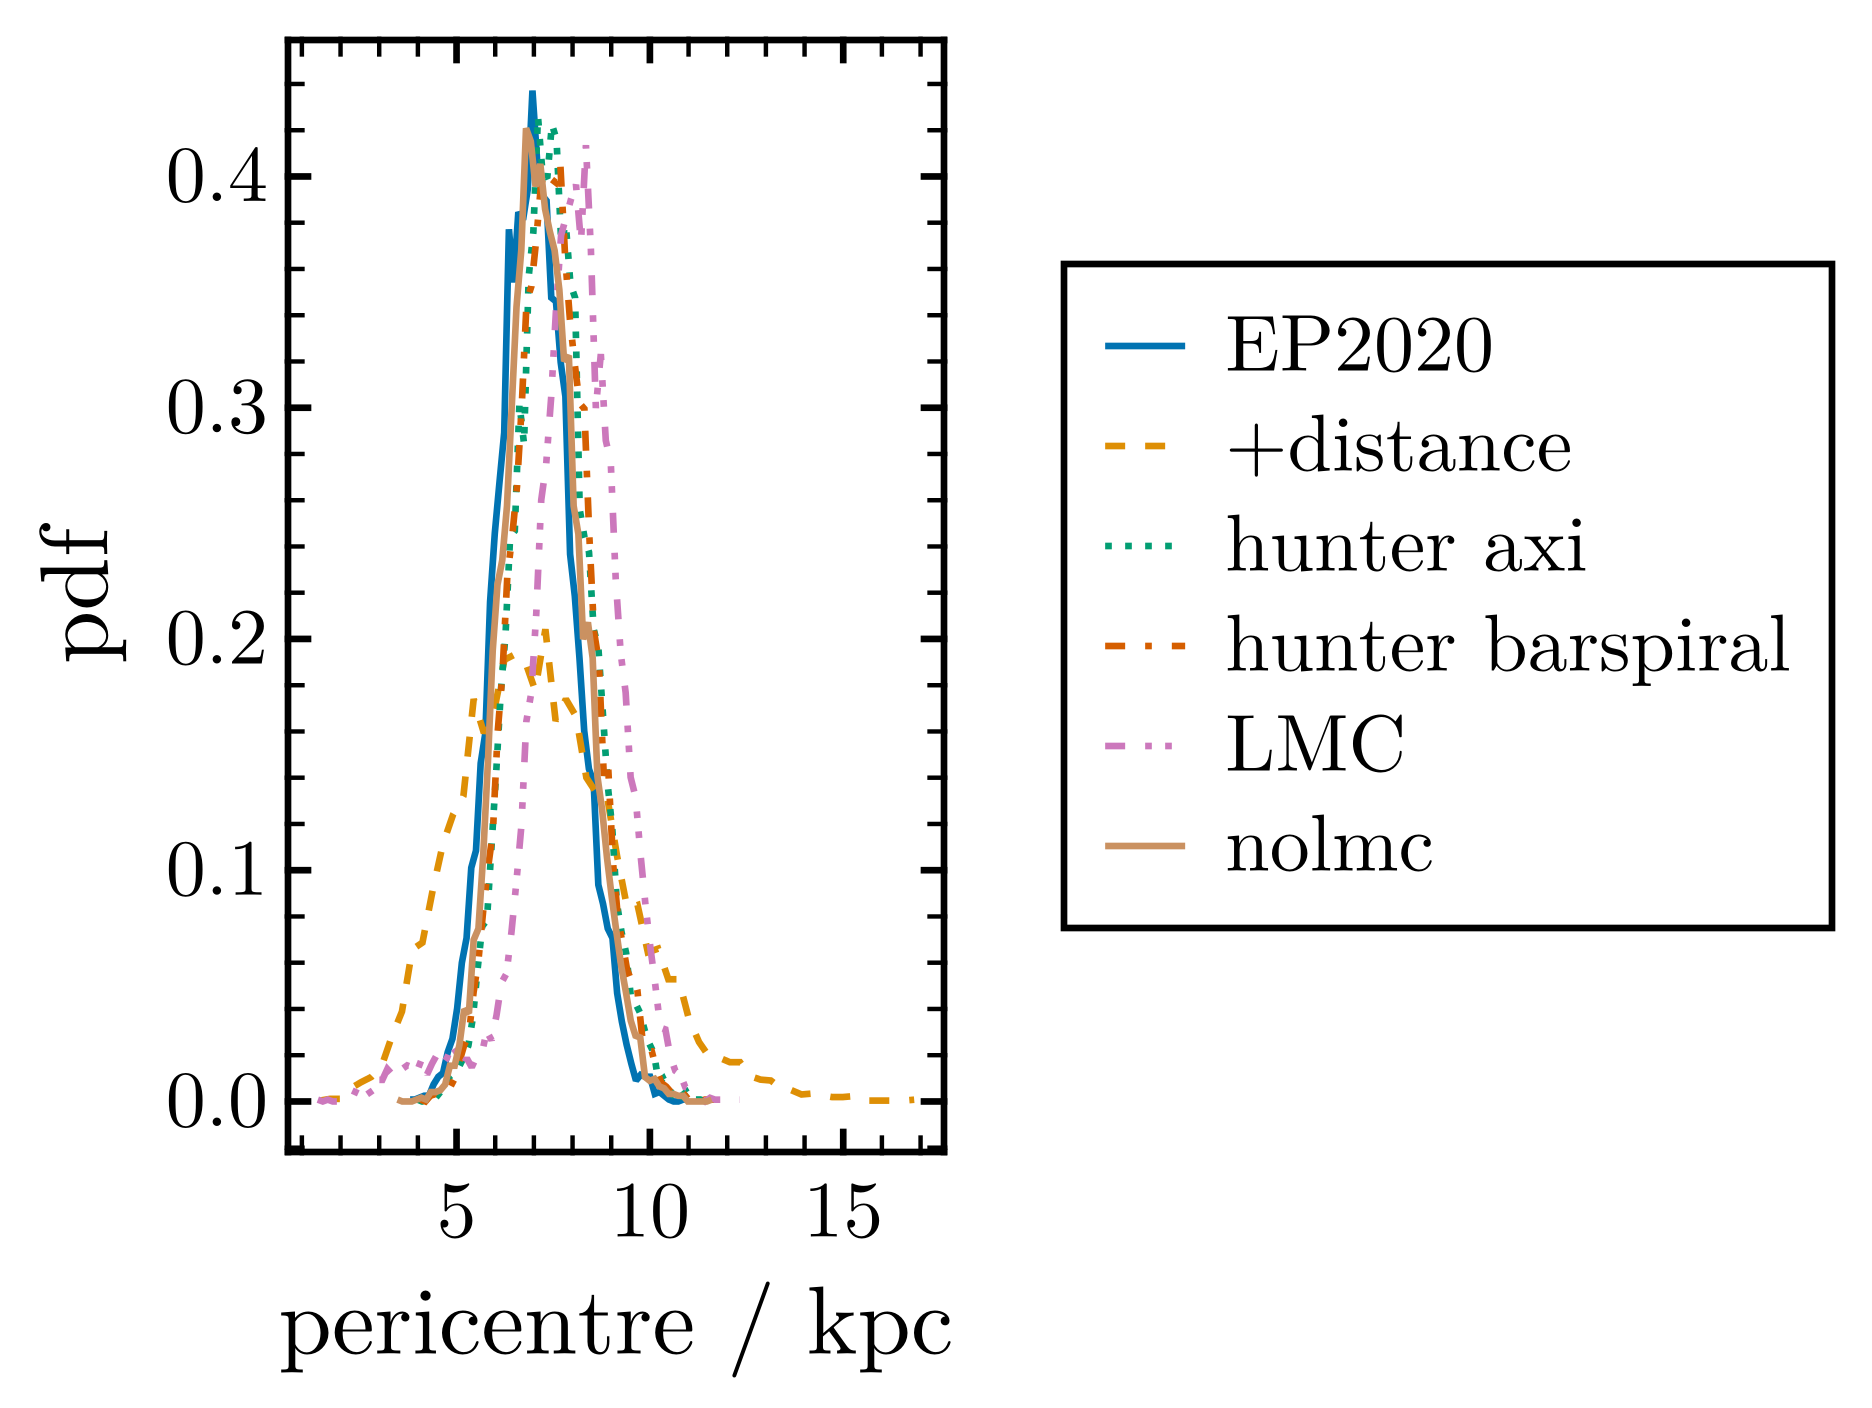

In [50]:
compare_peris(families)

[ Info: Using default bins of size = 66
[ Info: Using default bins of size = 70
[ Info: Using default bins of size = 73
[ Info: Using default bins of size = 60
[ Info: Using default bins of size = 145
[ Info: Using default bins of size = 71


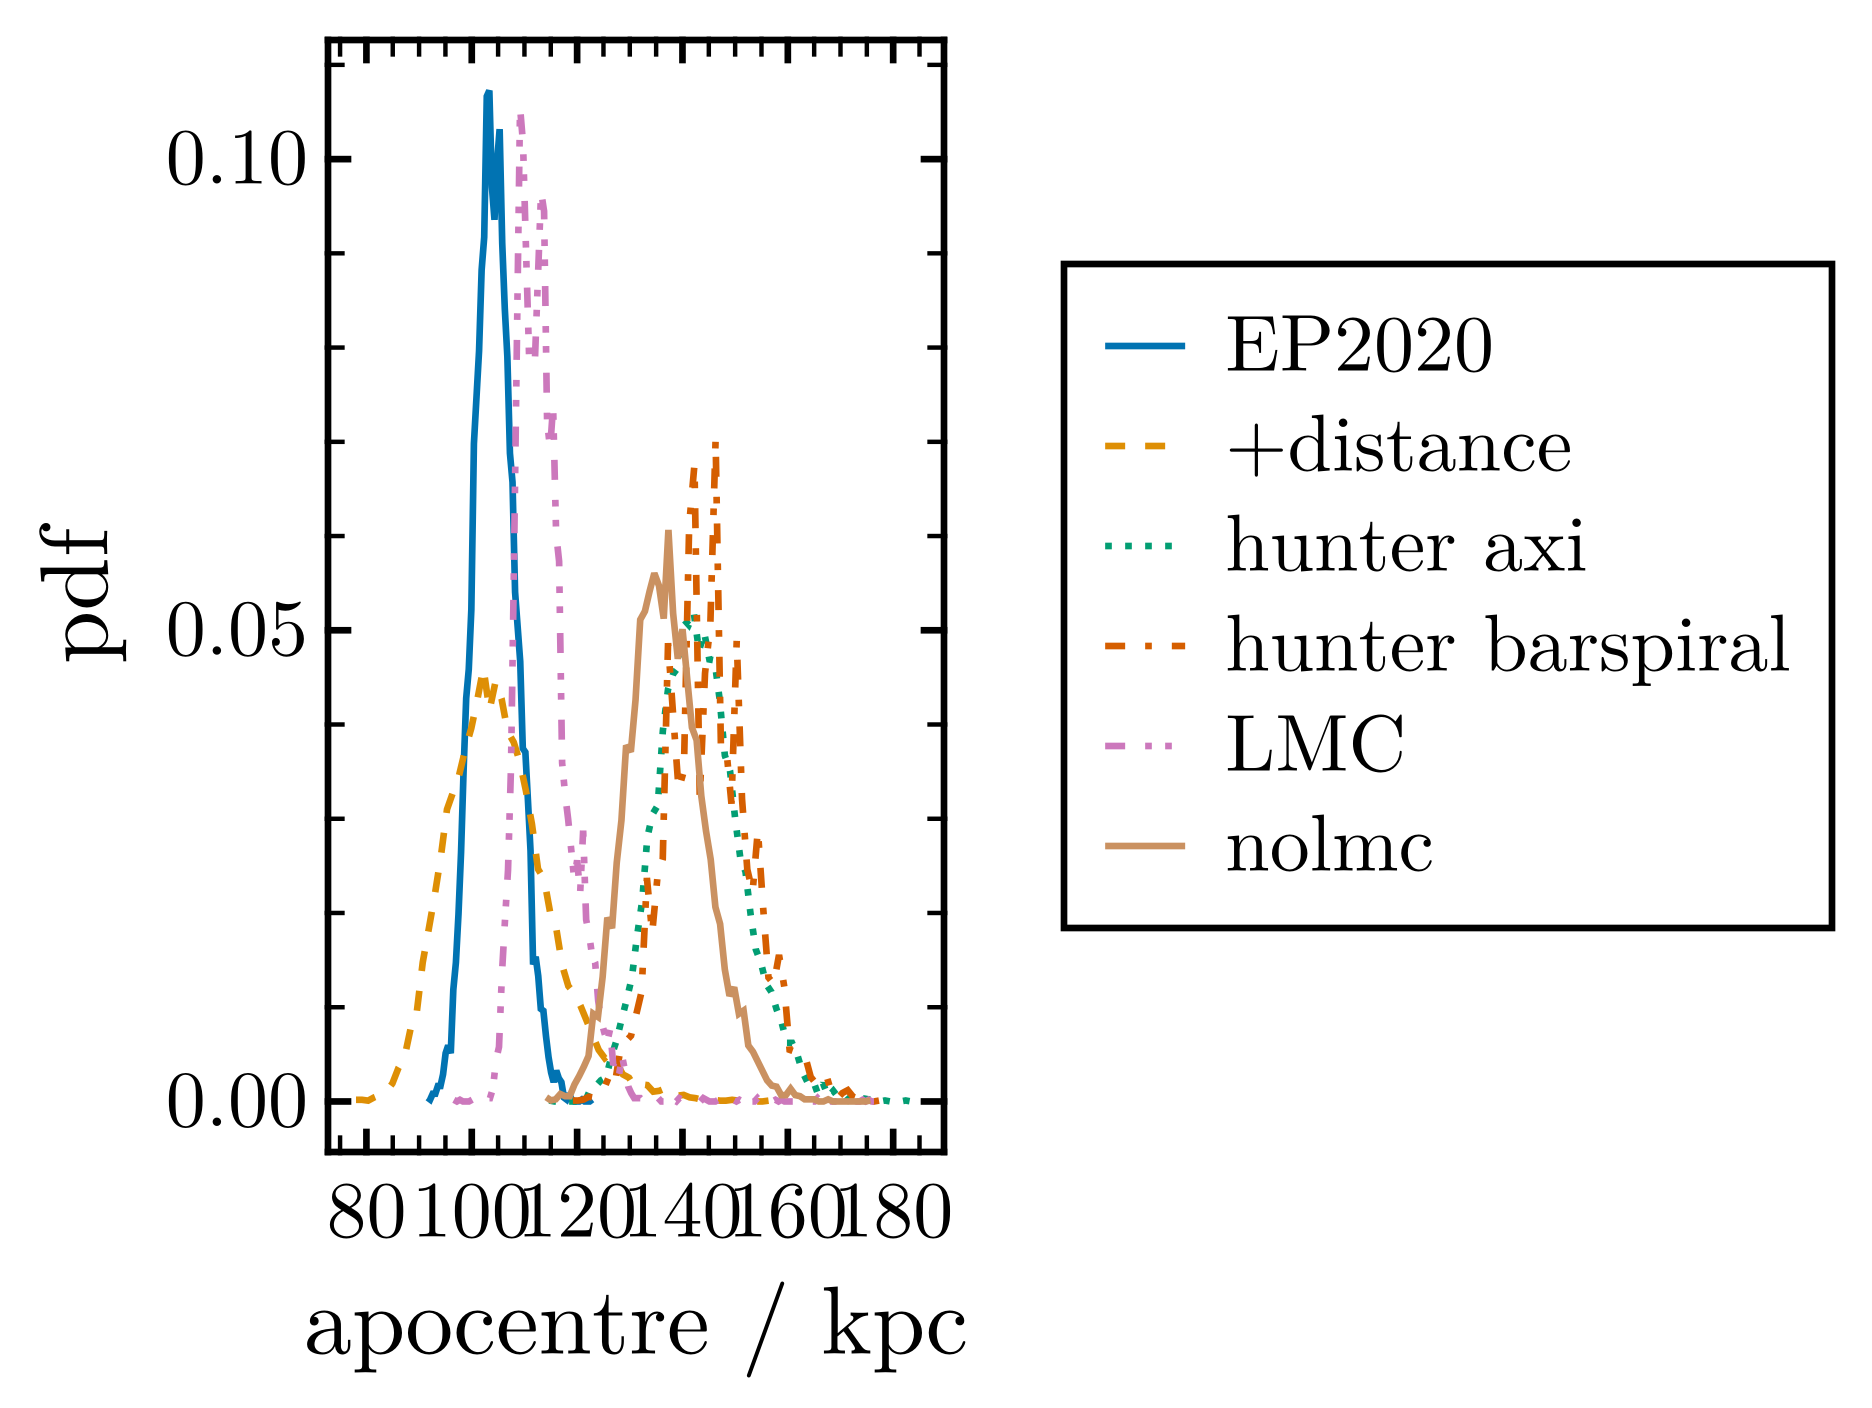

In [51]:
compare_apos(families)

In [52]:
families = [
    "EP2020" => read_distribution("EP2020"),
    "+distance" => read_distribution("EP2020_distance_err"),
    "hunter barspiral" => read_distribution("hunter+2024_rotspiral"),
    "hunter barspiral + distance" => read_distribution("hunter+2024_rotspiral_distance_err"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


In [54]:
compare_stats(families)

pericentre
          EP2020       7.019 [6.086 8.017] [[4.414 10.068]]
       +distance       7.058 [5.122 9.265] [[2.302 15.002]]
hunter barspiral       7.453 [6.487 8.444] [[4.771 10.576]]
hunter barspiral + distance       7.430 [5.466 9.789] [[2.228 16.006]]
t last peri
          EP2020       0.132 [0.127 0.132] [[0.122 0.137]]
       +distance       0.132 [0.122 0.137] [[0.109 0.151]]
hunter barspiral       0.137 [0.132 0.137] [[0.127 0.142]]
hunter barspiral + distance       0.137 [0.127 0.142] [[0.113 0.156]]
peri lmc
peri lmc time


[ Info: Using default bins of size = 61
[ Info: Using default bins of size = 60
[ Info: Using default bins of size = 63
[ Info: Using default bins of size = 68


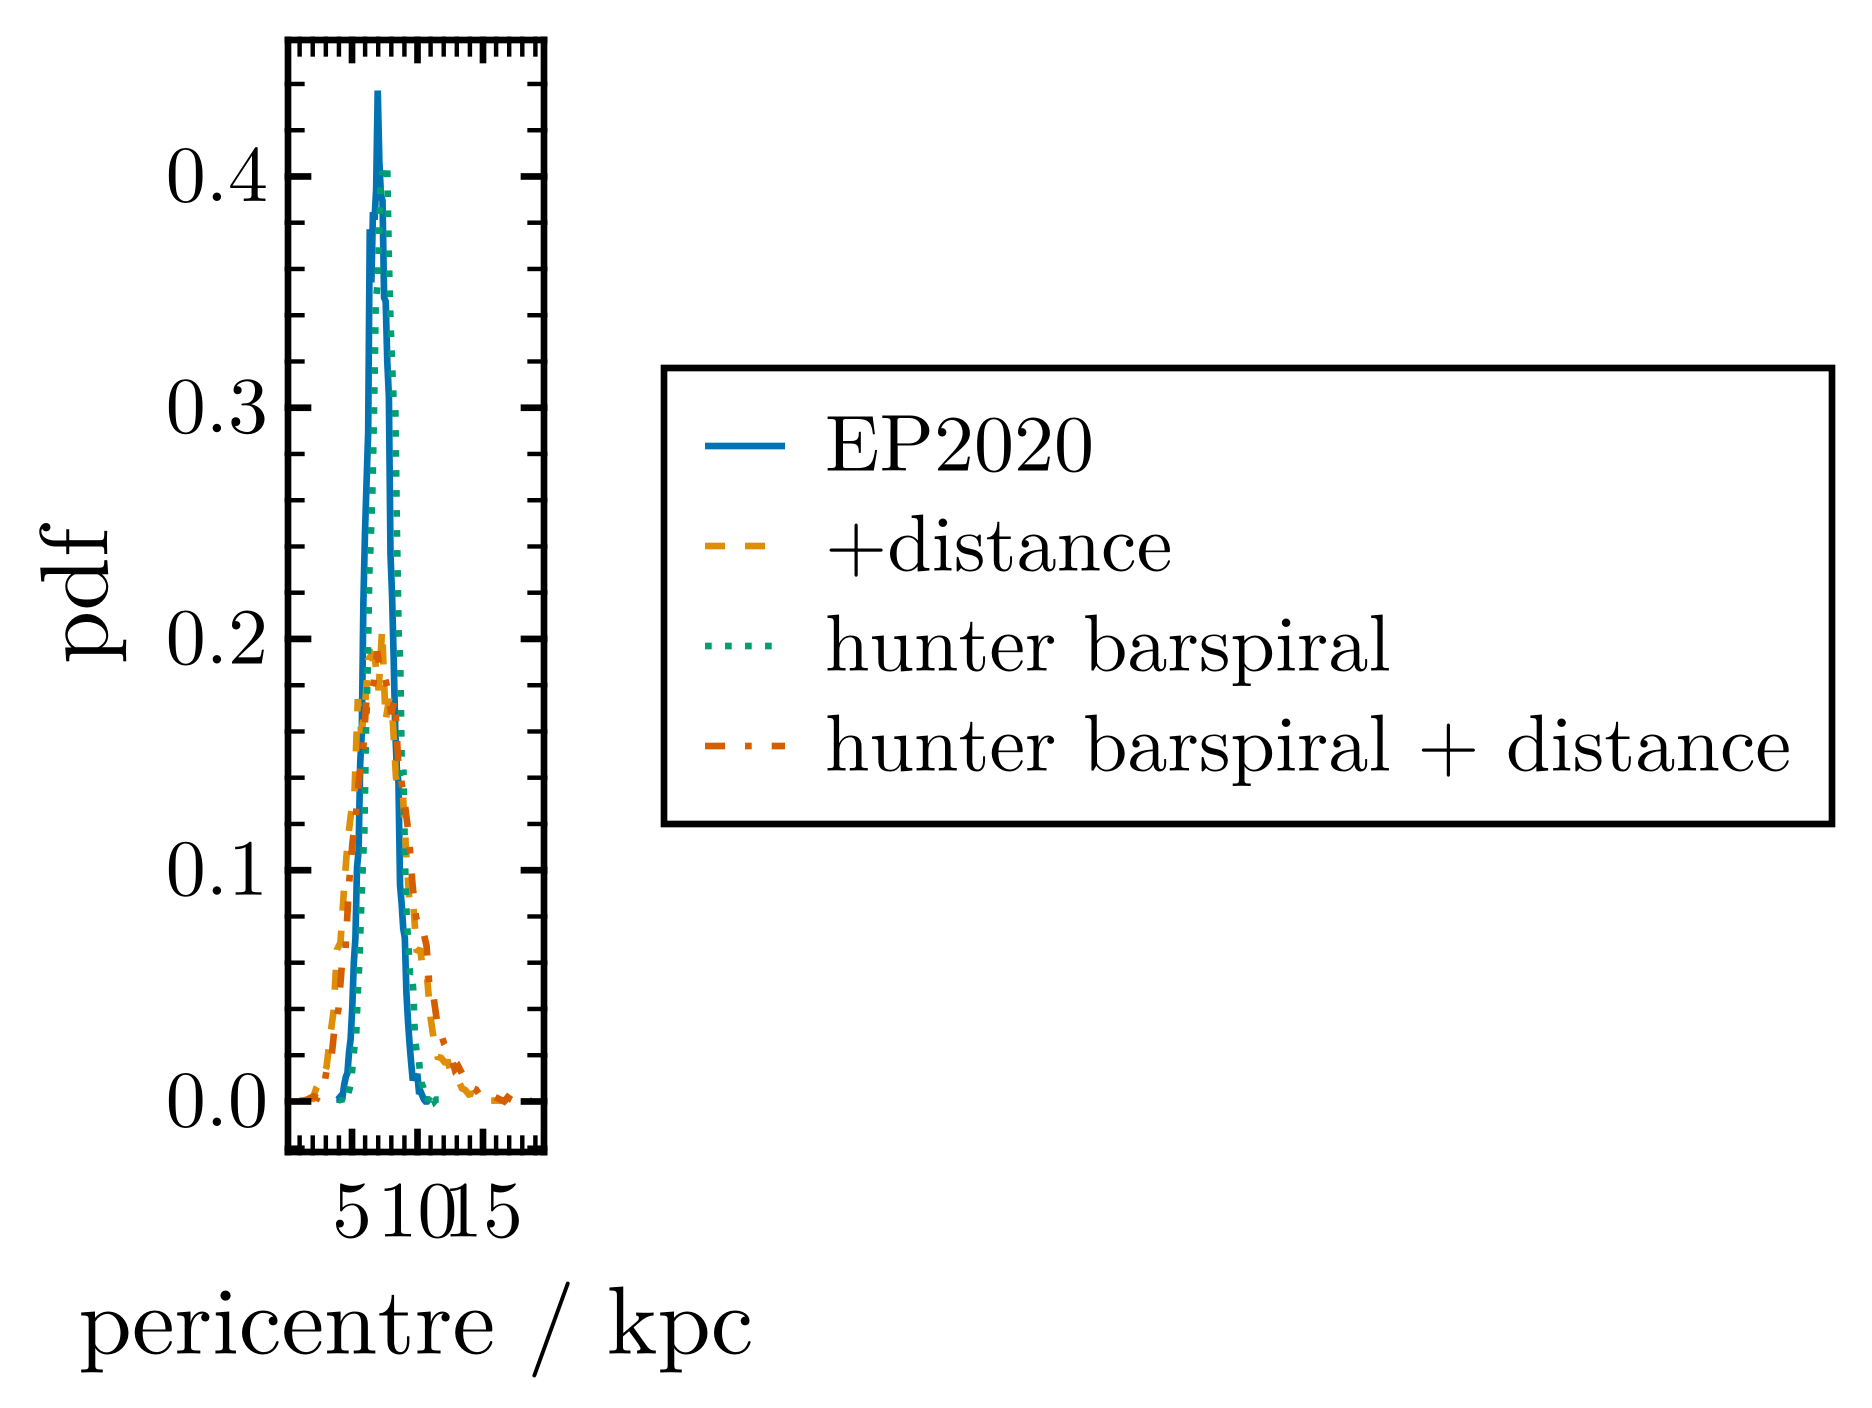

In [53]:
compare_peris(families)